<a href="https://colab.research.google.com/github/coder-jkb/TSA-Mini-Project/blob/main/TSA_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis on Microsoft Stock Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Introduction


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time series /Datasets/Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,04-01-2015,40.60,40.76,40.31,40.72,36865322
1,04-02-2015,40.66,40.74,40.12,40.29,37487476
2,04-06-2015,40.34,41.78,40.18,41.55,39223692
3,04-07-2015,41.61,41.91,41.31,41.53,28809375
4,04-08-2015,41.48,41.69,41.04,41.42,24753438


#Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [ ]:
import plotly.express as px

fig = px.line(df, x='Date', y="Close")
fig.show()

The data has an **uptrend**

The data contains 6 columns Date,The opening price,the high and low of the day and the closing price of the stock for the day

#Objective


To study the trend in microsoft stock data and predict the furthur closing price

#Data Cleaning

In [ ]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

There are no null values in the dataset

#Data Decomposition

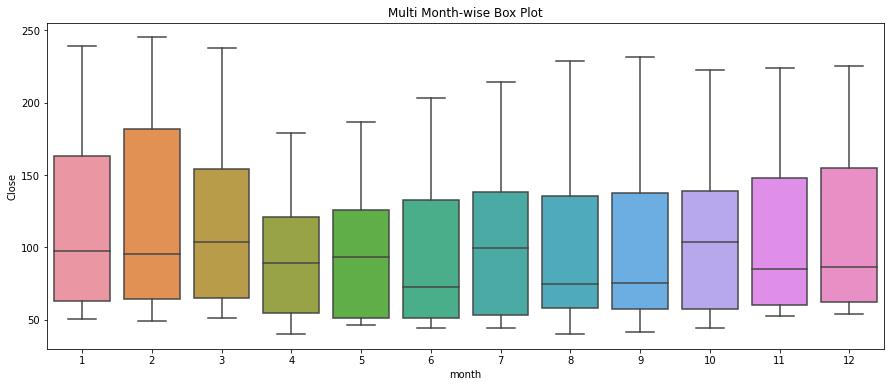

In [ ]:
df['month'] = pd.to_datetime(df['Date']).dt.month
df['year'] = pd.to_datetime(df['Date']).dt.year
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Close', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

In [ ]:
plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

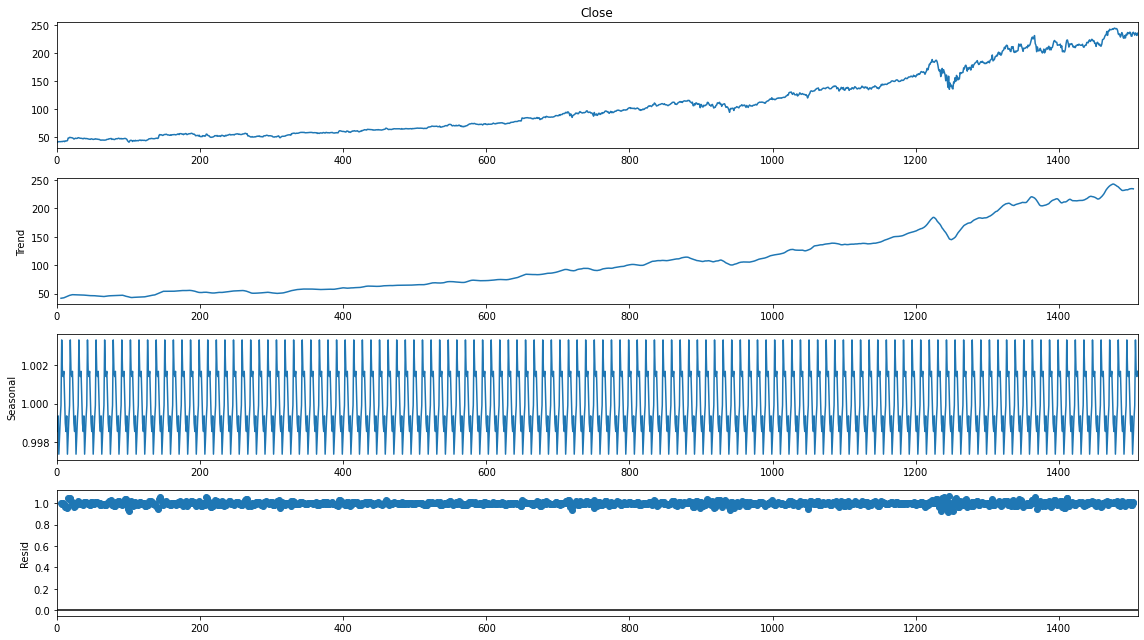

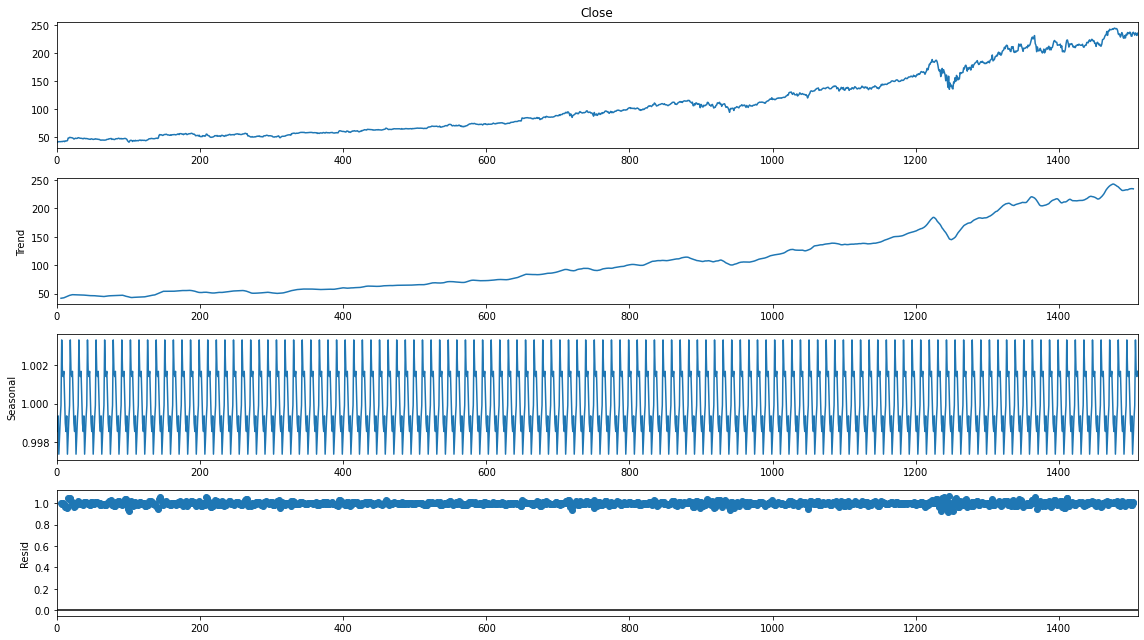

In [ ]:
result=seasonal_decompose(df['Close'], model='multiplicable', period=12)
result.plot()

#Smoothing methods


##Simple exponential smoothing

Importing the dataset

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn import metrics


#Splitting the dataset into
X = df['Close']
test = X.iloc[-30:]
train = X.iloc[:-30]


In [ ]:
#smoothing_level (float, optional) – The smoothing_level value of the simple exponential smoothing, if the value is set then this value will be used as the value.
#optimized (bool) – Should the values that have not been set above be optimized automatically?

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 16717.924158134323
MAE is : 129.2429341297529
RMSE is : 129.29781188455712
MAPE is : 55.197081172286246
R2 is : -1177.3030942825758

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 29.877690907507038
MAE is : 4.537003745945315
RMSE is : 5.466048930215228
MAPE is : 1.95552173393015
R2 is : -1.10582218900691

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 86.87096862370613
MAE is : 8.603127894023782
RMSE is : 9.320459678776908
MAPE is : 3.700481125304634
R2 is : -5.122789538008087

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 106.70631191305088
MAE is : 9.623461127642598
RMSE is : 10.329874728816941
MAPE is : 4.137694908637714
R2 is : -6.520812770612601

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 112.56115650112498
MAE is : 9.918317439689975
RMSE is : 10.609484271213422
MAPE is : 4.2637636179810485
R2 is : -6.933470552129968


,smoothing parameter,RMSE
1,0.1,5.466049
2,0.2,9.320460
3,0.3,10.329875
4,0.4,10.609484
5,0.5,10.695474
6,0.6,10.719846
7,0.7,10.724598
8,0.8,10.729080
9,0.9,10.745090
10,1.0,10.780461


In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 29.877690907507038
MAE is : 4.537003745945315
RMSE is : 5.466048930215228
MAPE is : 1.95552173393015
R2 is : -1.10582218900691



In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 115.05288900275575
MAE is : 10.043144594004861
RMSE is : 10.726270973770696
MAPE is : 4.317099787098674
R2 is : -7.109091406072377



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1481
Model:,SimpleExpSmoothing,SSE,7445.412
Optimized:,True,AIC,2395.638
Trend:,None,BIC,2406.239
Seasonal:,None,AICC,2395.665
Seasonal Periods:,None,Date:,"Thu, 22 Dec 2022"
Box-Cox:,False,Time:,02:59:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7558888,alpha,True
initial_level,40.689523,l.0,True


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229    , 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229    , 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

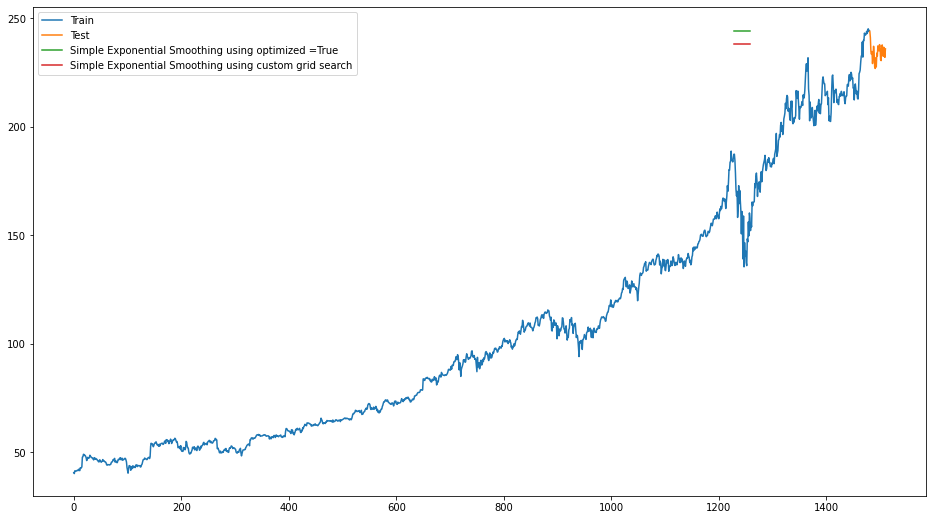

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

##Using Double exponential smoothing

In [ ]:
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Streaming output truncated to the last 5000 lines.
1497    261.262483
1498    262.008516
1499    262.754549
1500    263.500582
1501    264.246615
1502    264.992648
1503    265.738681
1504    266.484714
1505    267.230747
1506    267.976780
1507    268.722814
1508    269.468847
1509    270.214880
1510    270.960913
dtype: float64
 RMSE is 27.125319673809717
0.2 0.3 0.8 False
1481    247.230391
1482    247.194489
1483    247.158588
1484    247.122687
1485    247.086785
1486    247.050884
1487    247.014983
1488    246.979081
1489    246.943180
1490    246.907278
1491    246.871377
1492    246.835476
1493    246.799574
1494    246.763673
1495    246.727772
1496    246.691870
1497    246.655969
1498    246.620067
1499    246.584166
1500    246.548265
1501    246.512363
1502    246.476462
1503    246.440561
1504    246.404659
1505    246.368758
1506    246.332857
1507    246.296955
1508    246.261054
1509    246.225152
1510    246.189251
dtype: float64
 RMSE is 13.162110855287198
0.2 0.4 0

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
0,0.1,0.1,0.1,True,5.537474,-1.161215


In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

Dep. Variable:,Close,No. Observations:,1481
Model:,Holt,SSE,11271.279
Optimized:,False,AIC,3013.749
Trend:,Additive,BIC,3034.951
Seasonal:,None,AICC,3013.806
Seasonal Periods:,None,Date:,"Fri, 09 Dec 2022"
Box-Cox:,False,Time:,05:17:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 111.33715109398402
MAE is : 9.85715538213162
RMSE is : 10.551642104145877
MAPE is : 4.237614983955855
R2 is : -6.847200908542008



In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

Dep. Variable:,Close,No. Observations:,1481
Model:,Holt,SSE,7395.993
Optimized:,True,AIC,2389.775
Trend:,Additive,BIC,2410.977
Seasonal:,None,AICC,2389.832
Seasonal Periods:,None,Date:,"Fri, 09 Dec 2022"
Box-Cox:,False,Time:,05:17:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7489852,alpha,True
smoothing_trend,0.000000,beta,True


In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 165.24169615792908
MAE is : 12.220643018458839
RMSE is : 12.854637146101366
MAPE is : 5.2476865553991585
R2 is : -10.64646998309613



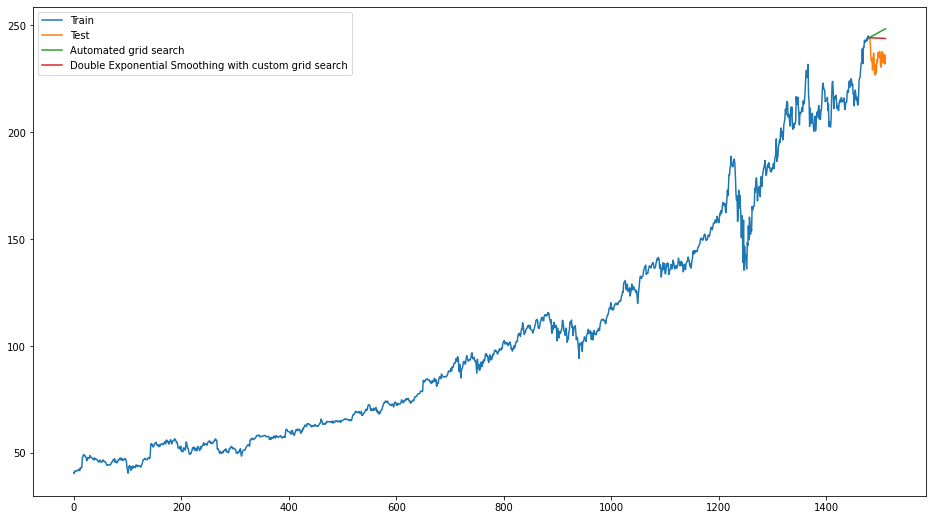

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()


#ADF fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='aic') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    dfoutput = pd.Series(dftest[0:5], index=['Test Statistic',
                                             'p-value','No Lags Used',
                                             'Number of Observations Used',
                                             ' Critical values'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
       # Critical values for the ADF test for 1%, 5%, and 10% significance levels
       #  with the constant model are −3.43, −2.87, and −2.57, respectively.
    print(dfoutput)

    p_value = dftest[1]
    if p_value <= 0.05 :
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close'] , 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                                                          1.737136
p-value                                                                 0.998216
No Lags Used                                                                  24
Number of Observations Used                                                 1486
 Critical values               {'1%': -3.4347582315402434, '5%': -2.863486949...
Critical Value (1%)                                                    -3.434758
Critical Value (5%)                                                    -2.863487
Critical Value (10%)                                                   -2.567807
dtype: object
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


### 1st Differencing

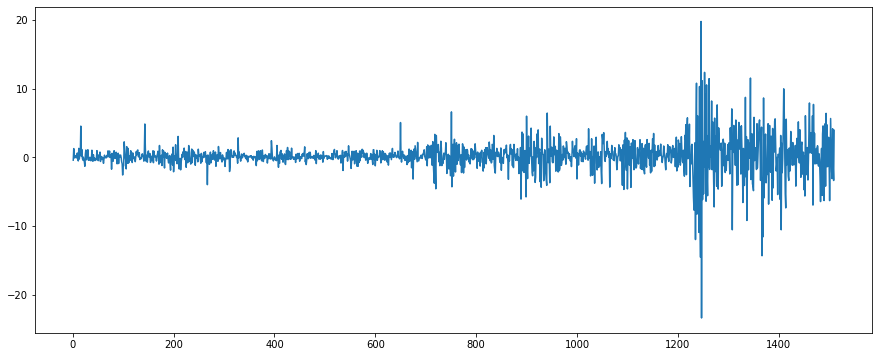

In [ ]:
close = df['Close'].diff().dropna()
close.plot(figsize=(15,6))

In [ ]:
Augmented_Dickey_Fuller_Test_func(close , 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                                                        -10.038331
p-value                                                                      0.0
No Lags Used                                                                  24
Number of Observations Used                                                 1485
 Critical values               {'1%': -3.43476120520139, '5%': -2.86348826217...
Critical Value (1%)                                                    -3.434761
Critical Value (5%)                                                    -2.863488
Critical Value (10%)                                                   -2.567807
dtype: object
Conclusion:====>
Reject the null hypothesis
Data is stationary


#Why it is a time series problem

By analyzing the previous trend of the stock's closing price we can forcast the upcoming price

#Forcasting

## ARIMA

### Applying Auto ARIMA on stationary dataset

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima

In [ ]:
from pmdarima import auto_arima
arima = auto_arima(df['Close'], trace=True, suppress_warnings=True)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6761.238, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6876.786, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6760.385, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6770.738, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6879.320, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6762.379, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6762.380, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6764.095, Time=0.95 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6766.263, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.160 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1511
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -3377.192
Date:                Fri, 09 Dec 2022   AIC                           6760.385
Time:                        05:19:30   BIC                           6776.344
Sample:                             0   HQIC                          6766.328
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1641      0.059      2.788      0.005       0.049       0.280
ar.L1         -0.2748      0.010    -28.723      0.000      -0.294      -0.256
sigma2         5.1303      0.074     69.006      0.000       4.985       5.276
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9082.00
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              20.43   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train Test Split

In [ ]:
split = 200

In [ ]:
train = df.iloc[:-split]
train

,Date,Open,High,Low,Close,Volume
0,04-01-2015,40.60,40.76,40.31,40.72,36865322
1,04-02-2015,40.66,40.74,40.12,40.29,37487476
2,04-06-2015,40.34,41.78,40.18,41.55,39223692
3,04-07-2015,41.61,41.91,41.31,41.53,28809375
4,04-08-2015,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1306,06-09-2020,188.00,190.70,187.26,189.80,29783916
1307,06-10-2020,191.13,198.52,191.01,196.84,43872329
1308,06-11-2020,193.13,195.76,186.07,186.27,52854672
1309,06-12-2020,190.54,191.72,185.18,187.74,43373587


In [ ]:
test = df.iloc[-split:]
test

,Date,Open,High,Low,Close,Volume
1311,6/16/2020,192.89,195.58,191.46,193.57,42556656
1312,6/17/2020,195.03,196.32,193.69,194.24,25687822
1313,6/18/2020,194.00,196.49,194.00,196.32,23061648
1314,6/19/2020,198.59,199.29,194.37,195.15,44441141
1315,6/22/2020,195.79,200.76,195.23,200.57,32818929
...,...,...,...,...,...,...
1506,3/25/2021,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021,233.53,233.85,231.10,231.85,24792012


In [ ]:
print(f"Shape:\n> df: {df.shape}\n> train: {train.shape}\n> test: {test.shape}")

Shape:
> df: (1511, 6)
> train: (1311, 6)
> test: (200, 6)


### Fitting the ARIMA(1,1,0) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train['Close'], order=(1,0,0))
arima = model.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1311
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2789.295
Date:                Fri, 09 Dec 2022   AIC                           5584.589
Time:                        05:19:30   BIC                           5600.125
Sample:                             0   HQIC                          5590.416
                               - 1311                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.1654    106.444      0.856      0.392    -117.462     299.793
ar.L1          0.9995      0.001    742.961      0.000       0.997       1.002
sigma2         4.1044      0.041     98.930      0.000       4.023       4.186
===================================================================================
Ljung-Box (L1) (Q):                 158.42   Jarque-Bera (JB):             46795.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              16.51   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prediction using ARIMA

In [ ]:
results = arima.predict(start = 0, end = len(df)-1, typ='levels')
print(results[:5])

0    91.165448
1    40.743825
2    40.314028
3    41.573433
4    41.553442
Name: predicted_mean, dtype: float64


In [ ]:
results.index = df.index

In [ ]:
pred = pd.DataFrame({'Close':np.array(df['Close']),'Close_pred':results})
pred

,Close,Close_pred
0,40.72,91.165448
1,40.29,40.743825
2,41.55,40.314028
3,41.53,41.573433
4,41.42,41.553442
...,...,...
1506,232.34,180.293575
1507,236.48,180.251481
1508,235.24,180.209407
1509,231.85,180.167353


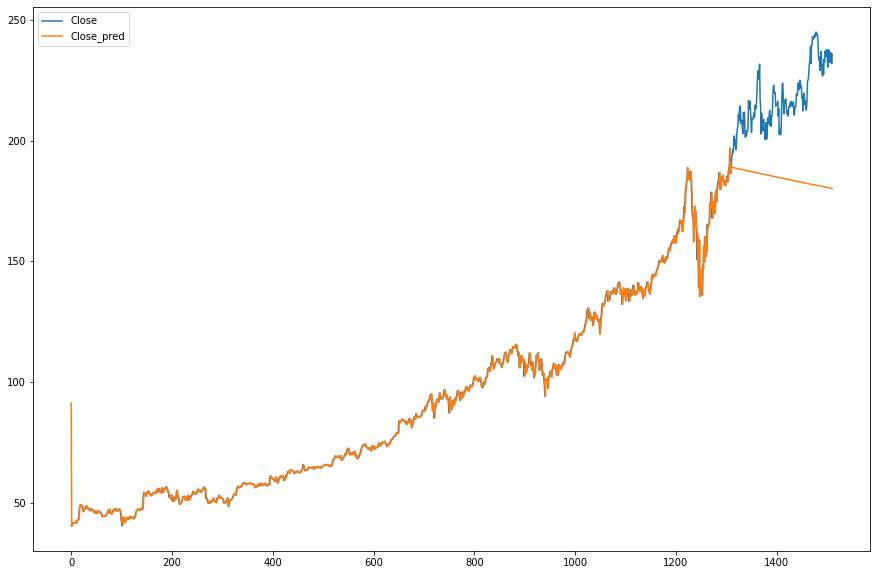

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(15,10))
pred['Close'].plot(legend=True)
pred['Close_pred'].plot(legend=True)

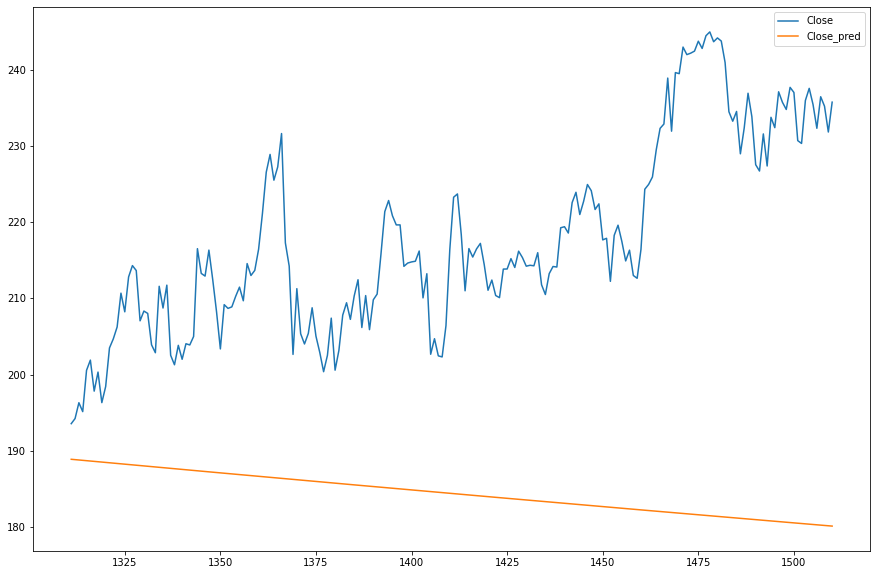

In [ ]:
pyplot.figure(figsize=(15,10))
pred['Close'][-split:].plot(legend=True)
pred['Close_pred'][-split:].plot(legend=True)

# **Because of volatility in the stock dataset ARIMA model cannot be used to forcast the future values.**

In [ ]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
!pip install arch --no-binary arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 15.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for arch: filename=arch-5.3.1-cp38-cp38-linux_x86_64.whl size=1500277 sha256=5661118563d0c6650623aab83c91215028008a96c80f7129e6fe26a2dafd5397
  Stored in directory: /root/.cache/pip/wheels/57/62/12/1bc306f6ac4b95e0df19248cd31e5d6dfb379cf3636eaacf09
Successfully built arch


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time series /Datasets/Microsoft_Stock.csv')

In [ ]:
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [ ]:
df = data['Close']
df.index = data['Date']
df.head()

Date
2015-04-01    40.72
2015-04-02    40.29
2015-04-06    41.55
2015-04-07    41.53
2015-04-08    41.42
Name: Close, dtype: float64

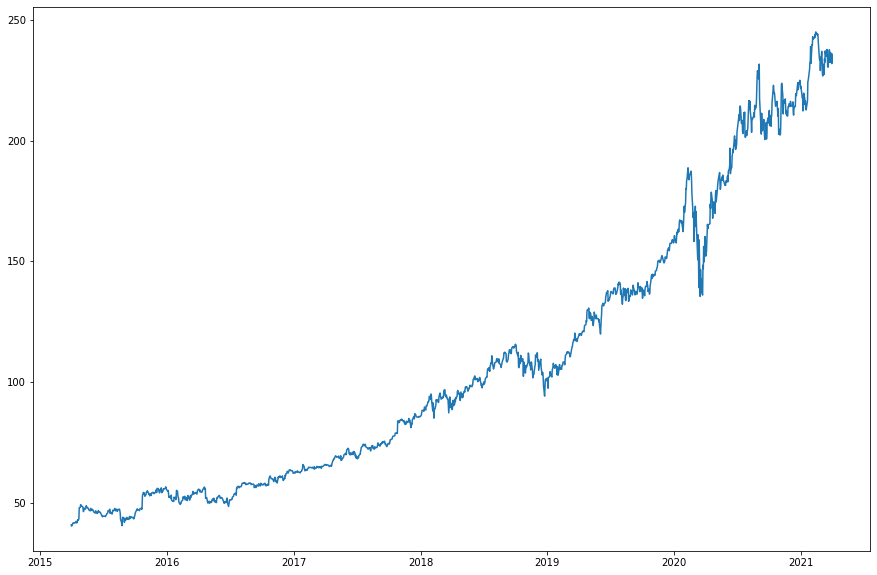

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df)

## Applying 1st differencing to make the data stationary

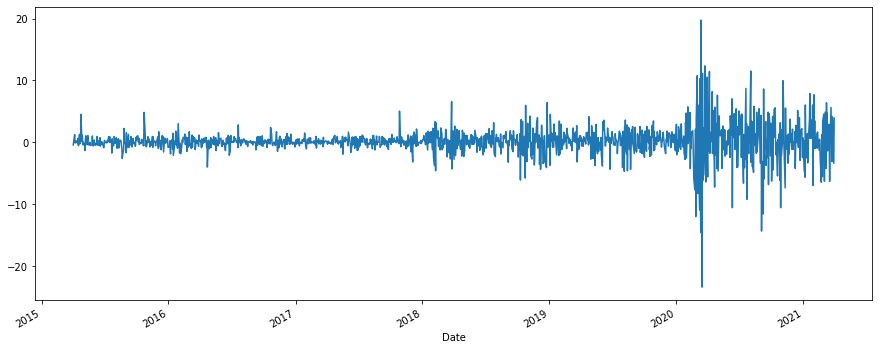

In [ ]:
df = df.diff().dropna()
df.plot(figsize=(15,6))

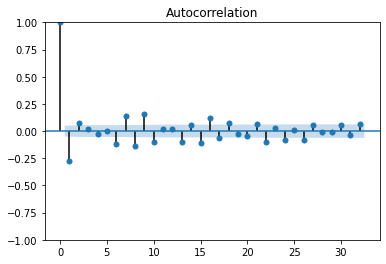

In [ ]:
plot_acf(df)
plt.show()

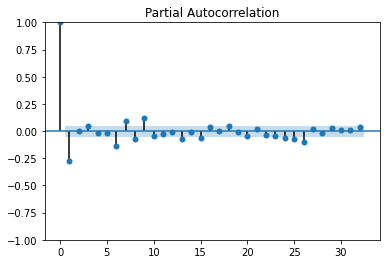

In [ ]:
plot_pacf(df)
plt.show()

## GARCH(1,1) model

In [ ]:
from arch import arch_model
garch = arch_model(df,vol='Garch', p=1, q=1)
result = garch.fit()
result.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 199173308074.74963
Iteration:      2,   Func. Count:     14,   Neg. LLF: 996946082.1510222
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2822.77576354669
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2739.4435833236485
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2976.544254853373
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2667.423829973483
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2668.1206931922798
Iteration:      8,   Func. Count:     50,   Neg. LLF: 8644.33074722627
Iteration:      9,   Func. Count:     56,   Neg. LLF: 2666.966527817863
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2666.964735361944
Iteration:     11,   Func. Count:     66,   Neg. LLF: 2666.965919347628
Iteration:     12,   Func. Count:     72,   Neg. LLF: 2666.964489350518
Iteration:     13,   Func. Count:     77,   Neg. LLF: 2666.964488258349
Iteration:     14,   Func. Count:     81,   Neg. LLF: 2666.9644

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2666.96
Distribution:                  Normal   AIC:                           5341.93
Method:            Maximum Likelihood   BIC:                           5363.21
                                        No. Observations:                 1510
Date:                Fri, Dec 09 2022   Df Residuals:                     1509
Time:                        05:20:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0861  2.619e-02      3.287  1.012e-03 [3.476e-02,  0.137]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0585  3.038e-02      1.926  5.414e-02 [-1.040e-03,  0.118]
alpha[1]       0.1783  6.586e-02      2.707  6.790e-03  [4.920e-02,  0.307]
beta[1]        0.8147  5.943e-02     13.707  9.192e-43    [  0.698,  0.931]
===========================================================================

Covariance estimator: robust
"""

## Rolling predictions

In [ ]:
def rolling_predictions(df, test_size):
  rolling_pred = []
  for i in range(test_size):
    train = df[:-(test_size-i)]
    model = arch_model(train, vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    pred = res.forecast(horizon=1)
    rolling_pred.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_pred = pd.Series(rolling_pred, index = df.index[-test_size:])
  return rolling_pred

### Test size: 10 %

In [ ]:
test_size = int(0.1*df.shape[0]) # 10 % test size
rolling_pred = rolling_predictions(df, test_size)

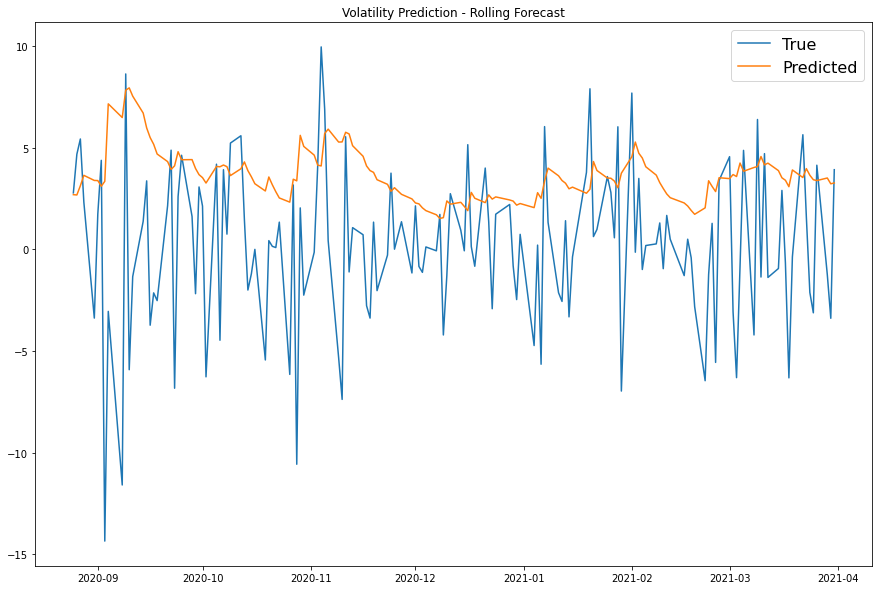

In [ ]:
plt.figure(figsize=(15,10))
true, = plt.plot(df[-test_size:])
pred, = plt.plot(rolling_pred)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True','Predicted'], fontsize=16)

### Test size: 20 %

In [ ]:
test_size = int(0.2*df.shape[0])
rolling_pred = rolling_predictions(df, test_size)

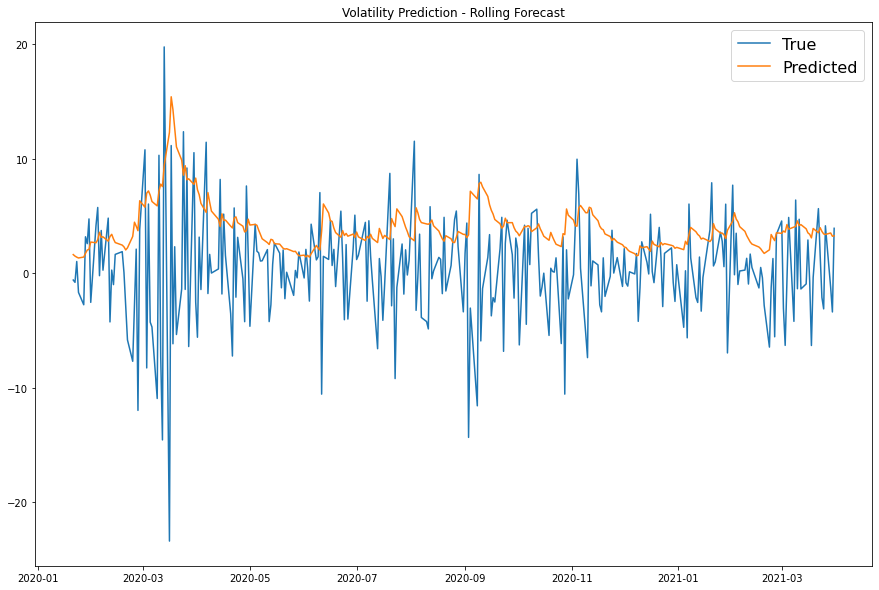

In [ ]:
plt.figure(figsize=(15,10))
true, = plt.plot(df[-test_size:])
pred, = plt.plot(rolling_pred)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True','Predicted'], fontsize=16)

# Applying CNN to the data

##Importing the libraries


In [ ]:
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv1D,MaxPooling1D

##Defining the function to extract the features and outputs from the sequence

In [ ]:
def split_sequence(sequence,steps):
  features,output=list(),list()

  for start in range(len(sequence)):
    end_index=start+steps

    if end_index>len(sequence)-1:
      break

    sequence_x,sequence_y=sequence[start:end_index],sequence[end_index]

    features.append(sequence_x)
    output.append(sequence_y)

  return array(features),array(output)

##Initializing the sequence using the Close of the Microsoft Stock

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time series /Datasets/Microsoft_Stock.csv')

df.head()

sequence=df['Close']

#choosong a step size of 3

steps=3

features,output=split_sequence(sequence,steps)
print("The sequence is : ")
print(sequence)
print("The features are: ")
print(features)
print("The step size is : ",steps)
print("The output list is: ",output)


The sequence is : 
0        40.72
1        40.29
2        41.55
3        41.53
4        41.42
         ...  
1506    232.34
1507    236.48
1508    235.24
1509    231.85
1510    235.77
Name: Close, Length: 1511, dtype: float64
The features are: 
[[ 40.72  40.29  41.55]
 [ 40.29  41.55  41.53]
 [ 41.55  41.53  41.42]
 ...
 [235.46 232.34 236.48]
 [232.34 236.48 235.24]
 [236.48 235.24 231.85]]
The step size is :  3
The output list is:  [ 41.53  41.42  41.48 ... 235.24 231.85 235.77]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time series /Datasets/Microsoft_Stock.csv')
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Reshaping the 2D input into 3D input data

In [ ]:
feature=1
X=features
X
features=features.reshape((features.shape[0],features.shape[1],feature))
print("THE SHAPE OF FEATURES")
print(features.shape)
print("The features after reshaping is: ")
print(features)

THE SHAPE OF FEATURES
(1508, 3, 1)
The features after reshaping is: 
[[[ 40.72]
  [ 40.29]
  [ 41.55]]

 [[ 40.29]
  [ 41.55]
  [ 41.53]]

 [[ 41.55]
  [ 41.53]
  [ 41.42]]

 ...

 [[235.46]
  [232.34]
  [236.48]]

 [[232.34]
  [236.48]
  [235.24]]

 [[236.48]
  [235.24]
  [231.85]]]


In [ ]:

X_train = features[:-500]
X_test = features[-500:]

Y_train = output[:-500]
Y_test = output[-500:]

##Definfing the CNN model

In [ ]:
model=Sequential()
model.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(steps,feature)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


##Fitting the model

In [ ]:
model.fit(X_train,Y_train,epochs=1000,verbose=0)

##Running the model

In [ ]:
import numpy as np


Y_pred=model.predict(X_test,verbose=0)


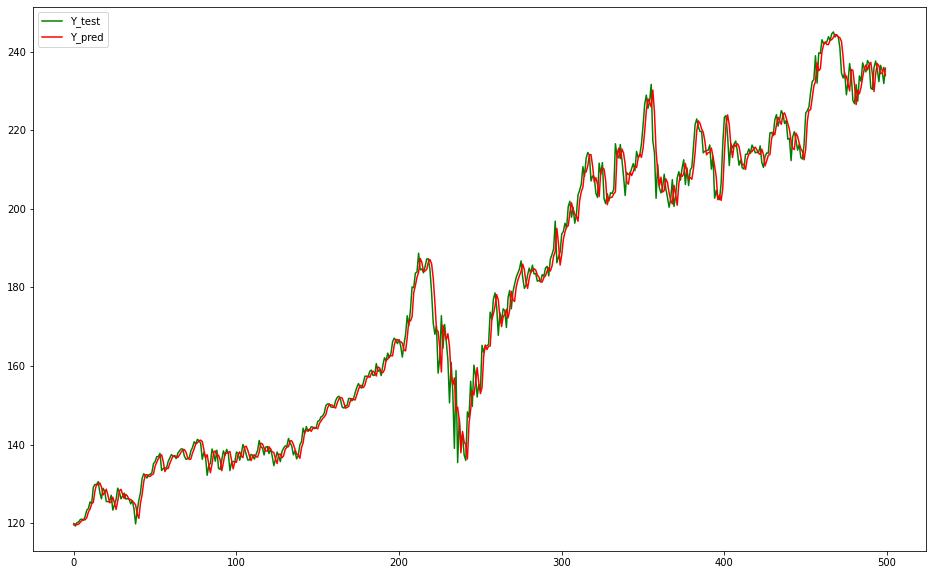

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(Y_test, color='g',label="Y_test")
plt.plot(Y_pred, color='r',label="Y_pred")
plt.legend(loc="upper left")

plt.show()

##REASONS FOR SELECTING THE TIME SERIES MODEL

Since the microsoft data is not stationary we cannot apply ARIMA model ,So since there is volatility in the data we use GARCH model and CNN method for forcasting